In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Diodo de silicio

- Resistencia $R=1$ $k\Omega$
- Diodo de silicio, tensión de apertura $V_D\approx0.7$ $V$
- Fuente tipo rampa, de $0-5$ $V$, periodo $T=100$ $msec$



### Cargo datos

<Axes: xlabel='t'>

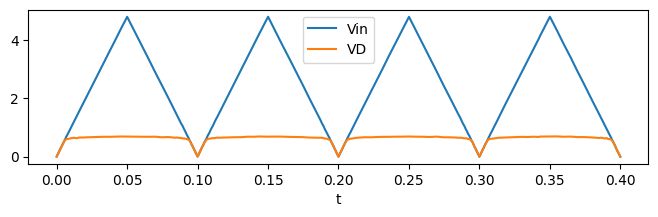

In [305]:
df = pd.read_csv("datos/diodo_silicio.csv")
df.plot( x='t', y=["Vin","VD"],figsize=(8,2) )

selecciono el pulso que va desde $0.1$ $sec$ a $0.2$ $sec$,

<Axes: xlabel='t'>

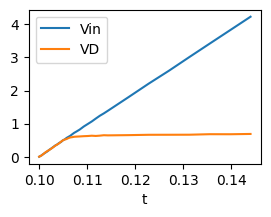

In [306]:
df_up = df[ (df["t"]>=0.1) & (df["t"]<=0.15) ].copy()
df_up.plot( x='t', y=["Vin","VD"],figsize=(3,2) )

### Relación entre tensión de entrada, tensión de salida y corriente

Tomamos los datos del pulso y calculamos la corriente (en $mA$),

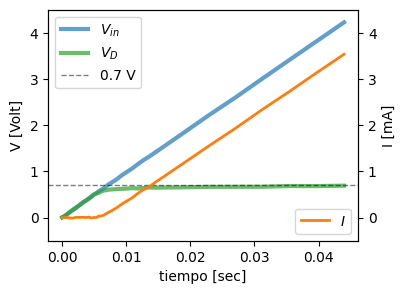

In [307]:
R=1000

t0 = 0.1
t = df_up["t"]-t0
VD = df_up["VD"].to_numpy()
Vin = df_up["Vin"].to_numpy()


I = ( (Vin-VD)/R )*1e3 # corriente en mA

fig,ax = plt.subplots(figsize=(4,3))

ax.plot(t, Vin, c='C0', label=r'$V_{in}$', linewidth=3, alpha=0.7)
ax.plot(t, VD, c='C2', label=r'$V_D$', linewidth=3, alpha=0.7)
ax.axhline( 0.7, linestyle='--', color='black', alpha=0.5, linewidth=1, label="0.7 V" )

ax2 = ax.twinx()
ax2.plot(t, I, c='C1', linewidth=2, label=r'$I$')

ax.set_xlabel( "tiempo [sec]" )
ax.set_ylabel( "V [Volt]" )
ax2.set_ylabel( "I [mA]" )

ax2.set_ylim(-0.5,4.5)
ax.set_ylim(-0.5,4.5)
ax.legend()
ax2.legend(loc=4)
plt.show()


La rampa comienta en $V_{in}=0$ y crece en forma lineal hasta $5V$. Vemos que para $V_{in}<0.7$, el diodo esta cerrado y funciona como un circuito abierto: la corriente en nula, y la tensión en los bornes del diodo es igual a la de la fuente$

Cuando $V_{in}\approx 0.7$ el diodo se abre y empieza a circular corriente. Si seguimos aumentando la tenisón de la fuente vemos que la tensión en los bornes del diodo se queda constante en $V_D=0.7$. El resto de la tensión de la fuente cae en la resistencia del circuito.

A continuación estudiamos la relación entre la tensión en los bornes del diodo y la corriente que circula por la rama, $V_D$ vs. $I$.


### Modelo: Ecuación de Shockly

Se plantea el modelo Shockley para ajustar la relación $V_D$ vs. $I$,

$$
I = I_s ( e^{\frac{V_D}{n V_T}} - 1 )
$$

$I_s$: Corriente de saturación inversa, depende del material, en el orden del pico ampere.

$n$: Idealidad,  entre 1 y 2; $n = 1$ para diodos ideales, $n \approx 1.3$ a 2 en diodos reales

$V_T$: Tensión térmica, ($V_T = \frac{kT}{q}\approx 26mV$):

Parámetros obtenidos del ajuste:
Is = (2.2481e-10 ± 2.5730e-10) [mA]
n = (1.1287e+00 ± 5.5842e-02) [V]


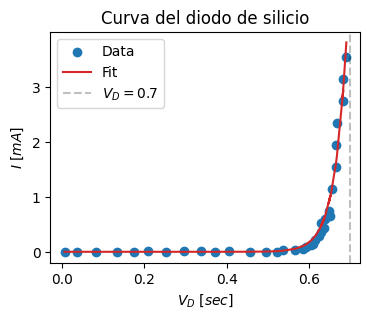

In [308]:
def modelo(x, Is,n):
    vT = 26e-3 # dejamos fijo
    I = Is * (np.exp(x / (n * vT)) - 1)
    return I


# Semillas
p0= [1e-12, 1.5]

#ajuste
popt, pcov = curve_fit(modelo,VD , I, p0=p0)      
Is_exp, n_exp = popt
SE_Is, SE_n = np.sqrt(np.diag(pcov))


print ("Parámetros obtenidos del ajuste:")
print(f"Is = ({Is_exp:.4e} ± {SE_Is:.4e}) [mA]")
print(f"n = ({n_exp:.4e} ± {SE_n:.4e}) [V]")

# plot
fig,ax = plt.subplots(figsize=(4,3))

ax.scatter(VD , I, c='C0', label=r'Data')
ax.plot( VD, modelo( VD, *popt ) , c='C3', label='Fit')
ax.axvline( 0.7, linestyle='--', color='black', alpha=0.25, label=r"$V_D=0.7$" )

ax.set_title("Curva del diodo de silicio")
ax.set_xlabel( r"$V_D$ $[sec]$" )
ax.set_ylabel( r"$I$ $[mA]$" )
ax.legend()
plt.show()

A pesar de ser un ajuste no lineal complicado, vemos que funciona bastante bien.

Respecto a la corriente de saturación vemos que es $I_s\approx 0.2pA$ lo cual esta en el orden de los esperado, el error en este caso es más grande que el parámetro, pero se puede ajusar de nuevo la curva fijando $n$ y dejendo libre $I_s$ para obtener un resultado más preciso.

Respecto al valor de $n$ vemos que esta en entre los valores 1 y 2, como esperabamos.



# Diodo Zenner

- Resistencia $R=1$ $k\Omega$
- Diodo de Zenner, tensión de apertura $V_D\approx0.7$ $V$, tensión de ruptura en inversa $V_Z = -6.8$ $V$
- Fuente tipo rampa, rango $(-10, 10)$ $V$, periodo $T=100$ $msec$

<Axes: xlabel='t'>

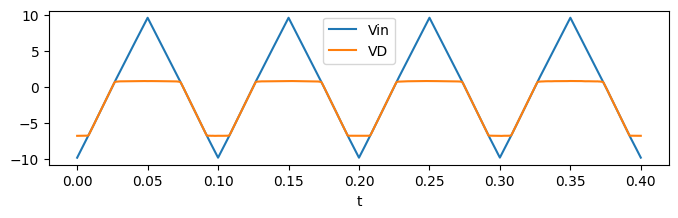

In [309]:
df = pd.read_csv("datos/diodo_zenner.csv")
df.plot( x='t', y=["Vin","VD"],figsize=(8,2) )

<Axes: xlabel='t'>

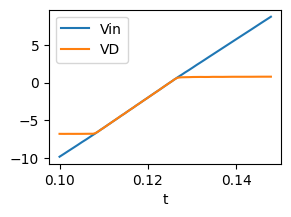

In [310]:
df_up = df[ (df["t"]>=0.1) & (df["t"]<=0.15) ].copy()
df_up.plot( x='t', y=["Vin","VD"],figsize=(3,2) )

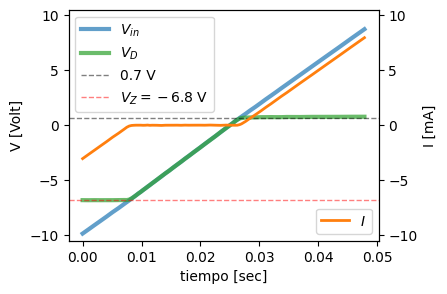

In [311]:
R=1000

t0 = 0.1
t = df_up["t"]-t0
VD = df_up["VD"].to_numpy()
Vin = df_up["Vin"].to_numpy()


I = ( (Vin-VD)/R )*1e3 # corriente en mA

fig,ax = plt.subplots(figsize=(4,3))

ax.plot(t, Vin, c='C0', label=r'$V_{in}$', linewidth=3, alpha=0.7)
ax.plot(t, VD, c='C2', label=r'$V_D$', linewidth=3, alpha=0.7)
ax.axhline( 0.7, linestyle='--', color='black', alpha=0.5, linewidth=1, label="0.7 V" )
ax.axhline( -6.8, linestyle='--', color='red', alpha=0.5, linewidth=1, label=r"$V_Z=-6.8$ V" )


ax2 = ax.twinx()
ax2.plot(t, I, c='C1', linewidth=2, label=r'$I$')

ax.set_xlabel( "tiempo [sec]" )
ax.set_ylabel( "V [Volt]" )
ax2.set_ylabel( "I [mA]" )

ax2.set_ylim(-10.5,10.5)
ax.set_ylim(-10.5,10.5)
ax.legend()
ax2.legend(loc=4)
plt.show()


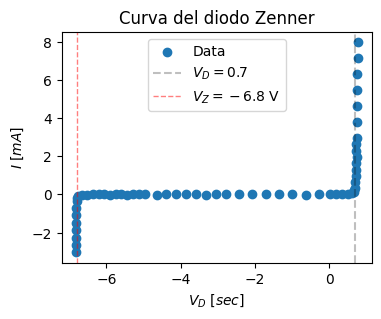

In [312]:
# plot
fig,ax = plt.subplots(figsize=(4,3))

ax.scatter(VD , I, c='C0', label=r'Data')
ax.axvline( 0.7, linestyle='--', color='black', alpha=0.25, label=r"$V_D=0.7$" )
ax.axvline( -6.8, linestyle='--', color='red', alpha=0.5, linewidth=1, label=r"$V_Z=-6.8$ V" )

ax.set_title("Curva del diodo Zenner")
ax.set_xlabel( r"$V_D$ $[sec]$" )
ax.set_ylabel( r"$I$ $[mA]$" )
ax.legend()
plt.show()

### Modelo para la zona de ruptura

La región de ruptura del Zener se puede aproximar con un modelo equivalente linealizado. Se puede modelar como una **fuente de voltaje DC ideal** ($V_Z$) en serie con una resistencia dinámica ($r_z$),

$$V_Z = V_{Z0} + I_Z \cdot r_z$$

Donde:
* $V_{Z0}$ es el voltaje teórico de ruptura del diodo Zener si se extrapolara la recta hasta $I_Z = 0\text{A}$ (el punto de corte en el eje de voltaje).
* $I_Z$ es la corriente que pasa por el diodo.
* $r_z$ es la resistencia dinámica.

Lo chequeamos en nuestros datos,

Parámetros obtenidos del ajuste:
rz = (4.4610e-03 ± 1.4486e-03) [kΩ]
vz0 = (-6.8036e+00 ± 2.5989e-03) [V]


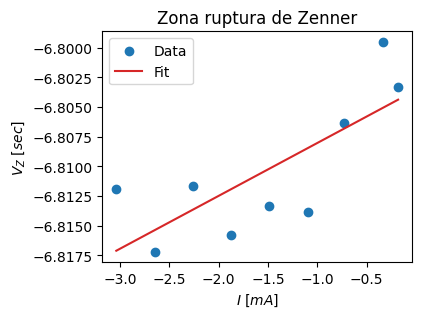

In [313]:
def modelo_Vz( I, rz, vz0 ):
    Vz = vz0 + I*rz
    return Vz

Vruptura = 0

# tomamos solo los datos para corrientes menores a cero
mask = (I<-0.095) 
y = VD[mask]
x = I[mask]     # en este analisis I será el eje horizontal


# Semillas
p0= [5e-3, -7]

#ajuste
popt, pcov = curve_fit(modelo_Vz, x , y, p0=p0)      
rz_exp, vz0_exp = popt
SE_rz, SE_vz0 = np.sqrt(np.diag(pcov))


print ("Parámetros obtenidos del ajuste:")
print(f"rz = ({rz_exp:.4e} ± {SE_rz:.4e}) [kΩ]")
print(f"vz0 = ({vz0_exp:.4e} ± {SE_vz0:.4e}) [V]")


# plot
fig,ax = plt.subplots(figsize=(4,3))

ax.scatter(x , y, c='C0', label=r'Data')

ax.plot(x , modelo_Vz(x,*popt), c='C3', label=r'Fit')

ax.set_title("Zona ruptura de Zenner")
ax.set_ylabel( r"$V_Z$ $[sec]$" )
ax.set_xlabel( r"$I$ $[mA]$" )

ax.legend()
plt.show()

Respecto a la resistencia dinámica del Zenner, encontramos un valor chico, $r_z \approx 4.4\Omega$. 

Respecto al voltaje teórico de ruptura, vemos que es $V_{Z0}\approx -6.8V$, muy similar al reportado por el fabricante.